# Task 2

## Changing the matrix dimensions

Firstly, we load the data from endeavour.npz and print its shape to be sure that we have the right matrix with shape - (100, 1296).

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
loaded = np.load('endeavour.npz')
task2 = loaded["task2"]
print(task2.shape)

(100, 1296)


## 2.a) Plotting the data

For the purpose of plotting we will reshape the 1D matrix to 2D matrix. In this case from shape (100, 1296) we will reshape to (100, 36, 36)

(100, 36, 36)


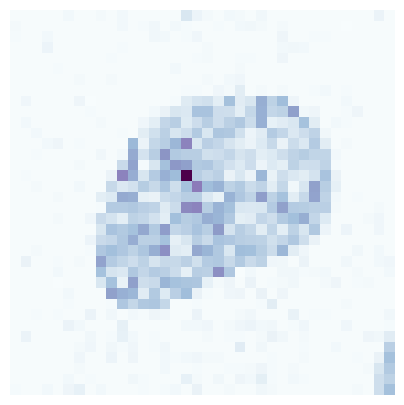

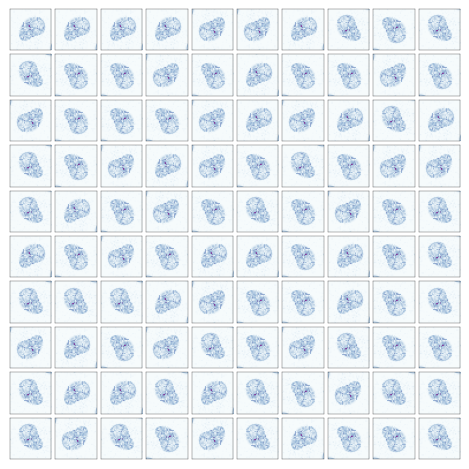

In [10]:
# Reshape each pattern back to 36x36 pixels
patterns = task2.reshape(-1, 36, 36)
print(patterns.shape)

#Plot 2D first image
plt.figure(figsize=(5, 5))
plt.imshow(patterns[0], cmap='BuPu')
plt.axis('off')
plt.show()

# Plot the 2D patters
fig, axes = plt.subplots(10, 10, figsize=(5, 5))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(patterns[i], cmap='BuPu')
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(0.2)
    ax.set_xticks([])
    ax.set_yticks([])

plt.subplots_adjust(wspace=0.1, hspace=0.1, left=0.05, right=0.95, top=0.95, bottom=0.05)
plt.show()

# For the next subproblems we will use functions from the first task

## 2.b) Listing every pattern as one of the rotation of the first pattern

Loading the functions from task 1

In [15]:
def rotate_pattern(pattern):
    rotations = [pattern]
    for _ in range(3):
        pattern = np.rot90(pattern)
        rotations.append(pattern)
    return rotations

def classify_pattern(pattern, rotations):
    for i, rot in enumerate(rotations):
        if np.array_equal(pattern, rot):
            return i * 90
    return None

Perfect! After loading this essential functions from task one we will list the number of the rotations from the new dataset.

In [18]:
# Get the reference pattern and its rotations
reference_pattern = patterns[0]
rotations = rotate_pattern(reference_pattern)

# Classify all patterns in task2
orientation_counts = {0: 0, 90: 0, 180: 0, 270: 0}
classifications = []

for pattern in patterns:
    orientation = classify_pattern(pattern, rotations)
    classifications.append(orientation)
    orientation_counts[orientation] += 1


# Print the number of patterns in each orientation (part b)
print("Number of patterns in each orientation:")
for orientation, count in orientation_counts.items():
    print(f"{orientation} degrees: {count}")

Number of patterns in each orientation:
0 degrees: 22
90 degrees: 25
180 degrees: 21
270 degrees: 32
